In [110]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [63]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Royal Challengers Bengaluru Women,1,1,0,0,0,2,0.869,W,"vs DC-W, MI-W, UPW-W",202/18.3,201/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG...","WFebruary 14, 2025, 1st Match, RCB Women vs GG..."
2,2Gujarat Giants Women,2,1,1,0,0,2,0.118,LW,"vs MI-W, DC-W, RCB-W",345/38.0,345/38.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW...","WFebruary 16, 2025, 3rd Match, GG Women vs UPW..."
4,3Delhi Capitals Women,1,1,0,0,0,2,0.050,W,"vs RCB-W, UPW-W, UPW-W",165/20.0,164/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ...","WFebruary 15, 2025, 2nd Match, DC Women vs MI ..."
6,4Mumbai Indians Women,1,0,1,0,0,0,-0.050,L,"vs GG-W, RCB-W, UPW-W",164/20.0,165/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"LFebruary 15, 2025, 2nd Match, MI Women vs DC ...","LFebruary 15, 2025, 2nd Match, MI Women vs DC ...","LFebruary 15, 2025, 2nd Match, MI Women vs DC ...","LFebruary 15, 2025, 2nd Match, MI Women vs DC ...","LFebruary 15, 2025, 2nd Ma

In [64]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Royal Challengers Bengaluru Women,1,1,0,0,0,2,0.869,W,"vs DC-W, MI-W, UPW-W",202/18.3,201/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Gujarat Giants Women,2,1,1,0,0,2,0.118,LW,"vs MI-W, DC-W, RCB-W",345/38.0,345/38.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Delhi Capitals Women,1,1,0,0,0,2,0.050,W,"vs RCB-W, UPW-W, UPW-W",165/20.0,164/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4Mumbai Indians Women,1,0,1,0,0,0,-0.050,L,"vs GG-W, RCB-W, UPW-W",164/20.0,165/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5UP Warriorz Women,1,0,1,0,0,0,-0.850,L,"vs DC-W, DC-W, RCB-W",143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.reset_index(inplace=True)

In [66]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [67]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,1,1,0,0,0,2,0.869,W,...,202/18.3,201/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Gujarat Giants Women,2,1,1,0,0,2,0.118,LW,...,345/38.0,345/38.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Delhi Capitals Women,1,1,0,0,0,2,0.050,W,...,165/20.0,164/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Mumbai Indians Women,1,0,1,0,0,0,-0.050,L,...,164/20.0,165/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,1,0,1,0,0,0,-0.850,L,...,143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df['Teams'].unique()

array(['Royal Challengers Bengaluru Women', 'Gujarat Giants Women',
       'Delhi Capitals Women', 'Mumbai Indians Women',
       'UP Warriorz Women'], dtype=object)

In [69]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,1,1,0,0,0,2,0.869,W,...,202/18.3,201/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Gujarat Giants Women,2,1,1,0,0,2,0.118,LW,...,345/38.0,345/38.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Delhi Capitals Women,1,1,0,0,0,2,0.050,W,...,165/20.0,164/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Mumbai Indians Women,1,0,1,0,0,0,-0.050,L,...,164/20.0,165/20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,1,0,1,0,0,0,-0.850,L,...,143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df['Rk']=np.arange(1,6)

In [71]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [72]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [73]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [74]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,1,1,0,0,0,2,0.869
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,2,1,1,0,0,2,0.118
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,1,1,0,0,0,2,0.050
3,4,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,1,0,1,0,0,0,-0.050
4,5,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,1,0,1,0,0,0,-0.850


In [75]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [76]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

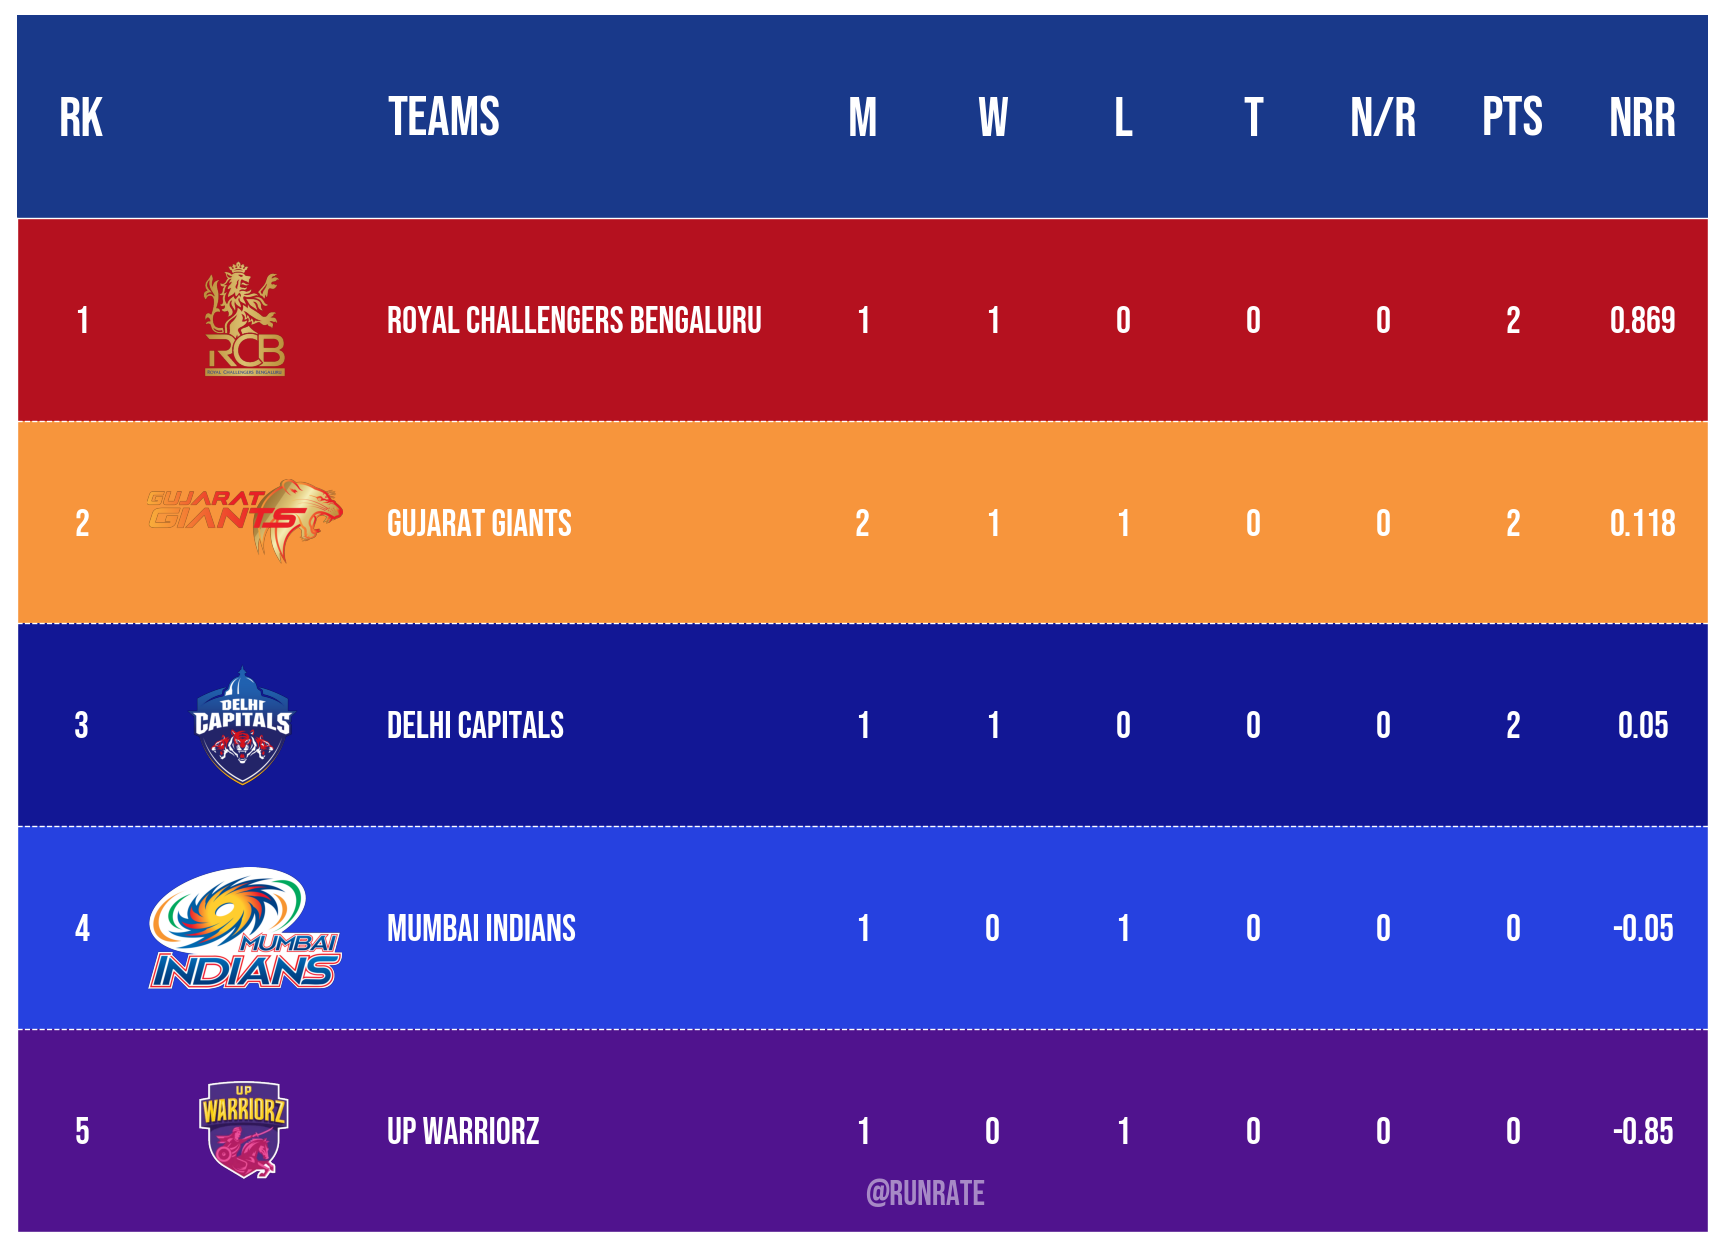

In [109]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#19398A')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(5.7,-1,'by runrate',color="black",fontsize=23,fontfamily='Alice')
ax.text(3.26,4.87,'@runrate',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [114]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)